In [1]:
# 1, Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\Anwender\Desktop\29-11-2020 Instacart Basket Analysis'

In [4]:
df_ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9_orders_products_customer_merged_Data.pkl'))

In [5]:
df_ords_prods_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,...,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196.0,1.0,Soda,77.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,Soda,77.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,Soda,77.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,Soda,77.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,Soda,77.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


<AxesSubplot:>

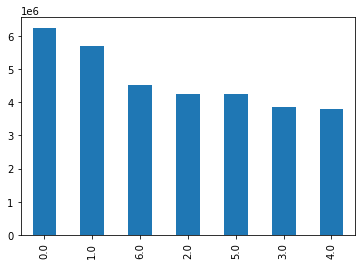

In [7]:
# 2, If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.
df_ords_prods_custs['orders_day_of_week'].value_counts().plot.bar()
# same result can be acheive using df_ords_prods_custs['orders_day_of_week'].value_counts().sort_index()plot.bar()

In [9]:
df_ords_prods_custs['orders_day_of_week'].value_counts(dropna = False)

0.0    6252941
1.0    5696724
6.0    4530304
2.0    4243173
5.0    4236989
3.0    3868747
4.0    3812390
Name: orders_day_of_week, dtype: int64

In [11]:
# The sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest).
This same trick can actually be used when printing frequencies, as well:
df_ords_prods_custs['orders_day_of_week'].value_counts(dropna = False).sort_index()

0.0    6252941
1.0    5696724
2.0    4243173
3.0    3868747
4.0    3812390
5.0    4236989
6.0    4530304
Name: orders_day_of_week, dtype: int64

<AxesSubplot:>

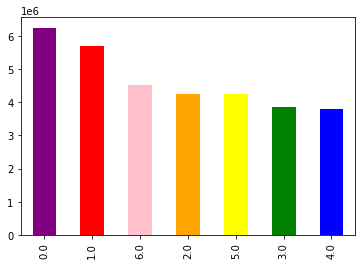

In [13]:
# adding a color argument in your plot.bar() function and listing the colors you want in order:
df_ords_prods_custs['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

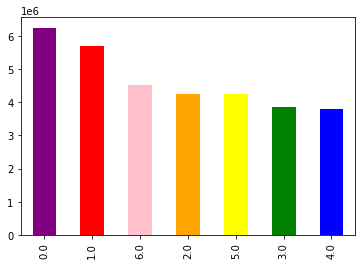

In [15]:
# bar chart has been saved within the bar object
bar = df_ords_prods_custs['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

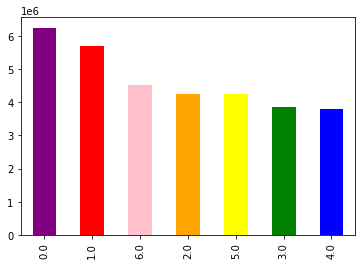

In [16]:
# to access it any time you like by calling bar.figure
bar.figure

In [ ]:
# to export it outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function: bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

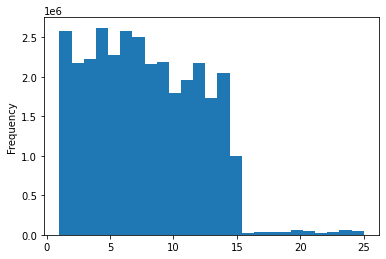

In [17]:
df_ords_prods_custs['prices'].plot.hist(bins = 25)

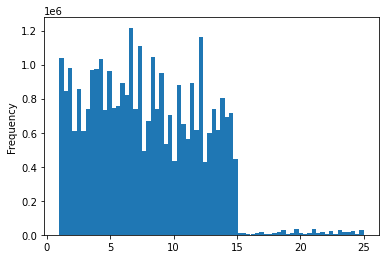

In [18]:
hist = df_ords_prods_custs['prices'].plot.hist(bins = 70)

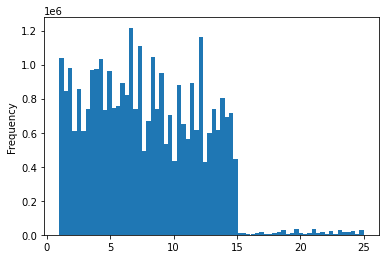

In [19]:
hist.figure

In [21]:
# saving the histogram
hist.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'hist_orders_dow.png'))

<AxesSubplot:xlabel='prices', ylabel='prices'>

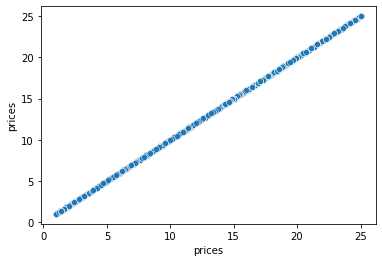

In [22]:
# scatterplot
# check for the outlier
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_custs)

In [23]:
# creating subset, In order to create a subset that actually represents the entirety of your data, you’d need more than just the first 2,000,000 rows. And, more importantly, those rows would need to be randomized. You can’t simply choose from the first or last customers in the dataframe—it needs to be a random assortment taken from all throughout the dataframe. Only then can you be sure it accurately represents the dataframe as a whole.
# In this case, you can split your dataframe into two samples with the same distribution, for instance an 80/20 or 70/30 split. If done correctly, both samples would have an equal proportion of data. In a 70/30 split, for example, the 30 percent sample would statistically resemble the 70 percent sample but contain less rows
# Creating these samples requires a list of random floating numbers between 0 and 1 (with 1 representing 100 percent of the dataframe) that’s as long as the length of the dataframe.
df = df_ords_prods_custs[:2000000]

In [24]:
# In the first line of the command, you set the “seed.” This “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers (in this case, seed “4”) rather than creating a new pattern of numbers every time you run the command. You don’t want that as your example needs to be reproducible by you and other analysts.
# The seed is set via the NumPy function random.seed(). We’ve set the seed to 4 for now. Feel free to do so as you follow along to ensure you’re using the same random pattern of numbers as in the examples. Then, in the second line of the command, you create a new list called dev. This will be what stores your boolean values—you’ll be getting an output of True or False for every value based on whether it’s less than or equal to 0.7:
np.random.seed(4)

In [26]:
# create a list holding True/False values to test the np.random.rant()<= 0.7
# np.random.rand() function being used as your argument.
# This function is what will actually create your list of random floating numbers between 0 and 1. The np at the beginning stands for the NumPy library, the random in the middle is a function that creates random numbers, and the rand at the end is a function that ensures the random numbers generated by random follow the uniform distribution. Uniform distribution simply means that there should be an equal chance for every number between 0 and 1 to occur in the distribution.
# len() produces a value that represents the length of whatever you put inside it. By passing your dataframe, you’ll receive an output of 32,434,212, which is how many rows are in your dataframe.
dev = np.random.rand(len(df_ords_prods_custs)) <= 0.7

In [27]:
dev

array([False,  True, False, ...,  True, False,  True])

In [29]:
np.random.rand(10)

array([0.79227379, 0.54149571, 0.53109233, 0.3016315 , 0.91662146,
       0.90125835, 0.66776966, 0.2148013 , 0.31056132, 0.19891516])

In [ ]:
# So, to recap each piece of the split code, you need to:
Set the seed for the random number generator.
Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
Store the results of the test in a new list, dev, in the form of boolean values (True and False)

In [31]:
# 70 percent of your dataframe in the big sample
big = df_ords_prods_custs[dev]

In [32]:
# 30 percent of your dataframe in the small sample.
small = df_ords_prods_custs[~dev]

In [ ]:
# 70 percent of your dataframe in the big sample and 30 percent of your dataframe in the small sample. You’ll do this according to the values in your dev list. For every value in the list that’s True, the corresponding row in your ords_prods_merge dataframe will be stored in the big sample. For every value in the list that’s False, the corresponding row in your dataframe will be stored in the small sample. Since True and False were determined by whether or not the random number was less than or greater than 0.7, this means that 70 percent of the rows should logically be sorted into big and 30 percent of the rows should logically be sorted into small. The tilde you see in the second line negates the argument, in other words, it stores everything that’s not dev, or False.

In [33]:
# using the len() function to add up
len(df_ords_prods_custs)


32641268

In [34]:
len(big) + len(small)

32641268

In [35]:
# reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_the_week.” You can achieve this by running (and checking the result!) of the following command:
df_2 = small[['orders_day_of_week','prices']]

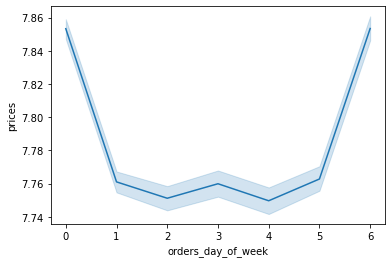

In [36]:
# create a line chart
# Line charts are traditionally used to visualize the development of a characteristic over time
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [37]:
# You’ve now created a line plot from a representative sample of your dataframe in order to avoid potential memory errors. Earlier on in this Exercise, you learned that using a subset of rows from the bottom or top of a dataframe wasn’t representative. But how do you know for a fact that the new line chart you’ve created is? The best way to check is to compare the line chart of your subset with the line chart of the entire dataframe (or even the big sample). For instance, the line chart of your entire dataframe would look like this:
df_3 = big[['orders_day_of_week','prices']]

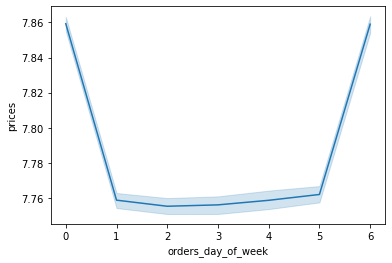

In [39]:
line_3 = sns.lineplot(data = df_3, x = 'orders_day_of_week',y = 'prices')

In [40]:
line.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'line1_orders_dow.png'))

In [41]:
line_3.figure.savefig(os.path.join(path, '02 Data', 'Prepared Data', 'line3_orders_dow.png'))

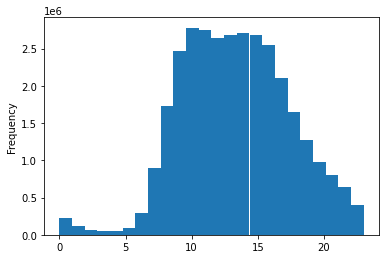

In [42]:
# 3, You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
# In a markdown cell beneath your histogram, describe what the histogram demonstrates.
hist_4 = df_ords_prods_custs['order_hour_of_day'].plot.hist(bins = 24)
# the histogram shows that order are been place between 5am to 20pm

In [55]:
hist_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_of_day.png'))

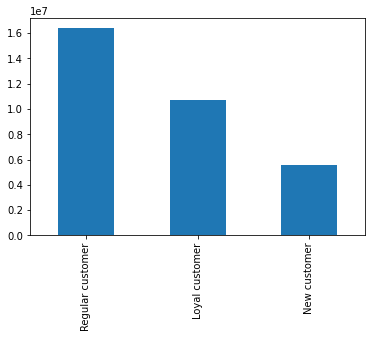

In [43]:
# 4, The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.
bar_2 = df_ords_prods_custs['loyalty_flag'].value_counts().plot.bar()

In [54]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag.png'))

In [47]:
# 5, Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)
df_4 = df_ords_prods_custs[['order_hour_of_day','prices']]

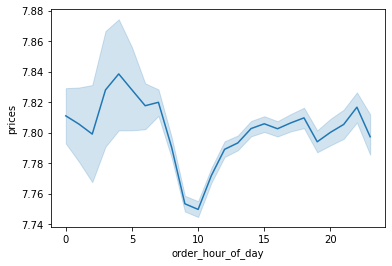

In [48]:
line_4 = sns.lineplot(data = df_4, x = 'order_hour_of_day', y = 'prices')

In [53]:
line_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_of_prices_line.png'))

In [49]:
# 6, Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
# In a markdown cell beneath your line chart, describe what the line chart shows.
df_5 = df_ords_prods_custs[['age', 'n_dependants']]

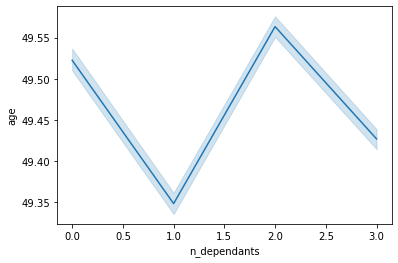

In [50]:
line_5 = sns.lineplot(data = df_5, x = 'n_dependants', y = 'age')
# The linechart shows the average number of dependants for customers who are the average age is (49.45) for instacart data

In [52]:
line_5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependants_line.png'))

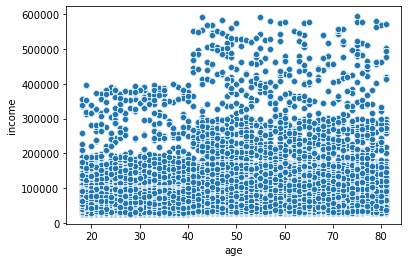

In [51]:
# 7, You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.
scatter_information = sns.scatterplot(x = 'age', y = 'income',data = df_ords_prods_custs)
# moving in the same direction with a slight positive correlation.

In [58]:
scatter_information.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatter.png'))

In [60]:
df_ords_prods_custs.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.9_ords_prods_custs_visual_Data.pkl'))